***FOREX FINACIAL BOT***

This project is for learning purpose only.
Alpha Vantage will be the main source of the real time data. By use of requests library I was able to import the API from Alpha.

In [2]:
import requests

api_key = 'CIVEY6DJ1KKAUPZK'
symbol = 'AAPL'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'
response = requests.get(url)
data = response.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2024-04-23', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-04-23': {'1. open': '165.3500', '2. high': '167.0500', '3. low': '164.9200', '4. close': '166.9000', '5. volume': '49537761'}, '2024-04-22': {'1. open': '165.5150', '2. high': '167.2600', '3. low': '164.7700', '4. close': '165.8400', '5. volume': '48116443'}, '2024-04-19': {'1. open': '166.2100', '2. high': '166.4000', '3. low': '164.0750', '4. close': '165.0000', '5. volume': '68149377'}, '2024-04-18': {'1. open': '168.0300', '2. high': '168.6400', '3. low': '166.5500', '4. close': '167.0400', '5. volume': '43122903'}, '2024-04-17': {'1. open': '169.6100', '2. high': '170.6500', '3. low': '168.0000', '4. close': '168.0000', '5. volume': '50901210'}, '2024-04-16': {'1. open': '171.7500', '2. high': '173.7600', '3. low': '168.2700', '4. close': '169.3800', '5

**Data Preprocessing**

First, we shall start by converting the JSON data into a pandas dataframe.

In [4]:
import pandas as pd

df = pd.DataFrame(data['Time Series (Daily)']).T
df = df.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'})
df = df.astype(float)
df.index = pd.to_datetime(df.index)
df = df.sort_index(ascending=True)

print(df.head())
print(df.tail())

              Open    High       Low   Close      Volume
2023-11-29  190.90  192.09  188.9700  189.37  43014224.0
2023-11-30  189.84  190.32  188.1900  189.95  48794366.0
2023-12-01  190.33  191.56  189.2300  191.24  45704823.0
2023-12-04  189.98  190.05  187.4511  189.43  43389519.0
2023-12-05  190.21  194.40  190.1800  193.42  66628398.0
               Open    High      Low   Close      Volume
2024-04-17  169.610  170.65  168.000  168.00  50901210.0
2024-04-18  168.030  168.64  166.550  167.04  43122903.0
2024-04-19  166.210  166.40  164.075  165.00  68149377.0
2024-04-22  165.515  167.26  164.770  165.84  48116443.0
2024-04-23  165.350  167.05  164.920  166.90  49537761.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-11-29 to 2024-04-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    100 non-null    float64
 1   High    100 non-null    float64
 2   Low     100 non-null    float64
 3   Close   100 non-null    float64
 4   Volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,182.334900,183.709587,180.881010,182.364000,5.896416e+07
std,9.710212,9.561226,9.641214,9.737428,1.951305e+07
min,165.350000,166.400000,164.075000,165.000000,2.891931e+07
25%,172.517500,173.962500,170.697500,172.672500,4.567140e+07
50%,183.450000,184.997500,181.582500,184.005000,5.356441e+07
75%,190.705000,191.985000,189.035000,191.320000,6.716102e+07
max,198.020000,199.620000,197.000000,198.110000,1.366826e+08


**Visualizing the Data**

We shall use the matplotlib library to visualize the data. We shall plot the closing, opening, high and low price of the stock. All shall be plotted within a chart with multiple subplots.

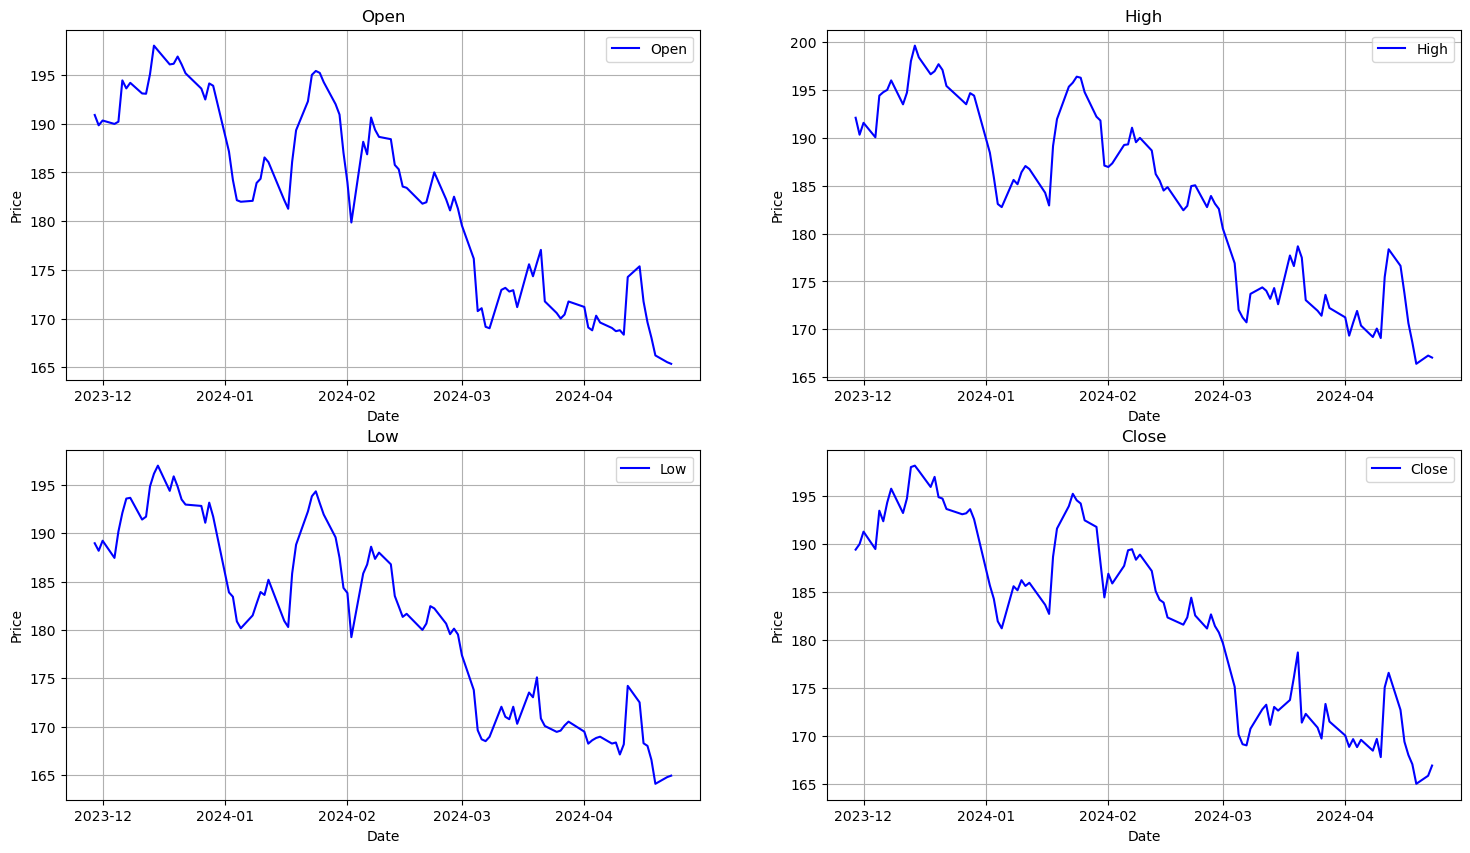

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
for c in df.columns:
    if c != 'Volume':
        plt.subplot(2, 2, list(df.columns).index(c) + 1)
        plt.plot(df.index, df[c], label=c, color = 'blue')
        plt.title(c)
        plt.legend()
        plt.grid()
        plt.xlabel('Date')
        plt.ylabel('Price')

plt.show()
